## Stock Performance of High-AI Companies ##

This analyis looks at how well a group of companies heavily focused on artifical intelligence (AI) have performed relative to other companies in the tech-heavy NASDAQ index and the S&P 500 over the past year.  The high-AI companies were selected for an unrelated project by me over a year ago, based on their identification in key news articles and publication rankings related to AI.  The list includes only publicly traded companies.  

The high AI companies include (with their ticker symbols): 
Apple (AAPL); 
Amazon(AMZN);
Baidu(BIDU);
Salesforce(CRM);
Facebook(FB);
Alphabet(GOOGL);
IBM (IBM);
Intel(INTC);
iRobot(IRBT);
Microsoft(MSFT);
Northrop Grumman(NOC);
NVIDIA(NVDA);
Tesla(TSLA);
Qualcomm(QCOM).

Indexes: 
S&P 500 (using the SPY tracking ETF); NASDAQ (QQQ tracking ETF).

In [142]:
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader
from datetime import date  

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette('muted')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,8

Read in and plot the raw stock price information

In [25]:
tickers=['AAPL', 'AMZN', 'BIDU', 'CRM', 'FB', 'GOOGL', 'IBM', 'INTC', 'IRBT', 
         'MSFT', 'NOC', 'NVDA', 'TSLA','QCOM', 'SPY', 'QQQ'] # Assign the tickers to variable 
AI_tickers=['AAPL', 'AMZN', 'BIDU', 'CRM', 'FB', 'GOOGL', 'IBM', 'INTC', 'IRBT', 
            'MSFT', 'NOC', 'NVDA', 'TSLA','QCOM']
panel = DataReader(tickers, 'google', start=date(2015, 1, 1)) # Read in the stock performance via the Google API --
                                                              # note that Google restricts to 250 days of data  
data = panel.to_frame()  # Convert the panel object to a frame object 
data.head()

Open    High     Low   Close      Volume
Date       minor                                            
2016-11-21 AAPL   110.12  111.99  110.01  111.73  29264571.0
           AMZN   766.00  780.35  765.11  780.00   4614574.0
           BIDU   165.00  167.25  164.50  165.69   1291108.0
           CRM     78.06   78.31   75.80   76.15   8549806.0
           FB     118.20  121.95  117.80  121.77  35415366.0

In [141]:
# data.to_pickle('stock_data_11_18_2017.pickle')

In [26]:
# Remove the multindex
data = data['Close'].unstack()
data.head()

minor,AAPL,AMZN,BIDU,CRM,FB,GOOGL,IBM,INTC,IRBT,MSFT,NOC,NVDA,QCOM,QQQ,SPY,TSLA
Date,,,,,,,,,,,,,,,,
2016-11-21,111.73,780.00,165.69,76.15,121.77,784.80,162.77,34.98,54.09,60.86,246.29,92.98,67.10,118.54,220.15,184.52
2016-11-22,111.80,785.33,164.47,75.57,121.47,785.00,162.67,35.48,54.95,61.12,248.07,93.65,68.31,118.90,220.58,191.17
2016-11-23,111.23,780.12,163.63,73.95,120.84,779.00,161.98,35.20,54.77,60.40,247.59,93.97,68.13,118.42,220.70,193.14
2016-11-25,111.79,780.37,164.44,73.73,120.38,780.23,163.14,35.44,55.09,60.53,248.58,94.16,68.29,118.80,221.52,196.65
2016-11-28,111.57,766.77,167.00,72.93,120.41,785.79,164.52,35.51,55.79,60.61,248.96,94.11,67.10,118.53,220.48,196.12


In [27]:
data.tail()

minor,AAPL,AMZN,BIDU,CRM,FB,GOOGL,IBM,INTC,IRBT,MSFT,NOC,NVDA,QCOM,QQQ,SPY,TSLA
Date,,,,,,,,,,,,,,,,
2017-11-13,173.97,1129.17,237.37,105.78,178.77,1041.20,148.40,45.75,70.09,83.93,298.48,212.63,66.49,153.87,258.33,315.40
2017-11-14,171.34,1136.84,234.92,106.23,178.07,1041.64,148.89,45.86,68.79,84.05,300.46,214.18,66.00,153.31,257.73,308.70
2017-11-15,169.08,1126.69,234.21,105.43,177.95,1036.41,147.10,45.46,68.26,82.98,299.94,209.98,65.61,152.59,256.44,311.30
2017-11-16,171.10,1137.29,239.32,107.03,179.59,1048.47,149.12,45.65,70.71,83.20,300.55,211.61,66.11,154.54,258.62,312.50
2017-11-17,170.15,1129.88,239.27,107.58,179.00,1035.89,148.97,44.63,71.45,82.40,296.85,211.36,66.72,153.95,257.86,315.05


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2016-11-21 to 2017-11-17
Data columns (total 16 columns):
AAPL     251 non-null float64
AMZN     251 non-null float64
BIDU     251 non-null float64
CRM      250 non-null float64
FB       251 non-null float64
GOOGL    251 non-null float64
IBM      250 non-null float64
INTC     251 non-null float64
IRBT     251 non-null float64
MSFT     251 non-null float64
NOC      250 non-null float64
NVDA     251 non-null float64
QCOM     251 non-null float64
QQQ      251 non-null float64
SPY      250 non-null float64
TSLA     251 non-null float64
dtypes: float64(16)
memory usage: 33.3 KB


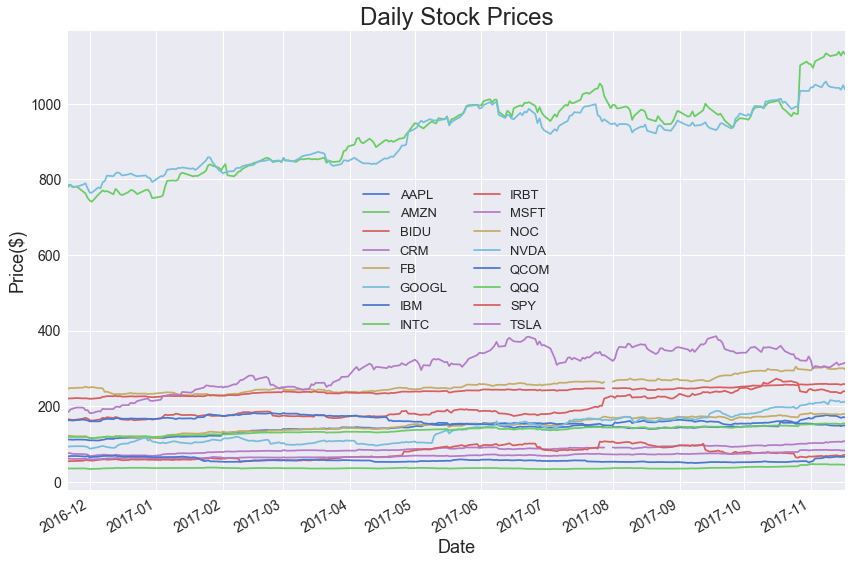

In [135]:
data.plot(figsize=(12,8))
plt.title('Daily Stock Prices', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price($)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=0,ncol=2,fontsize=13)
plt.tight_layout()
plt.show()

Normalize the stock price data for easier comparisons

In [42]:
normalized=data.div(data.iloc[0]).mul(100)
normalized.head()

minor,AAPL,AMZN,BIDU,CRM,FB,GOOGL,IBM,INTC,IRBT,MSFT,NOC,NVDA,QCOM,QQQ,SPY,TSLA
Date,,,,,,,,,,,,,,,,
2016-11-21,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2016-11-22,100.062651,100.683333,99.263685,99.238345,99.753634,100.025484,99.938564,101.429388,101.589943,100.427210,100.722725,100.720585,101.803279,100.303695,100.195321,103.603945
2016-11-23,99.552493,100.015385,98.756714,97.110965,99.236265,99.260958,99.514653,100.628931,101.257164,99.244167,100.527833,101.064745,101.535022,99.898768,100.249830,104.671580
2016-11-25,100.053701,100.047436,99.245579,96.822062,98.858504,99.417686,100.227315,101.315037,101.848771,99.457772,100.929798,101.269090,101.773472,100.219335,100.622303,106.573813
2016-11-28,99.856798,98.303846,100.790633,95.771504,98.883140,100.126147,101.075137,101.515152,103.142910,99.589221,101.084088,101.215315,100.000000,99.991564,100.149898,106.286581


In [43]:
print(normalized.iloc[-1])

minor
AAPL     152.286763
AMZN     144.856410
BIDU     144.408232
CRM      141.273802
FB       146.998440
GOOGL    131.994139
IBM       91.521779
INTC     127.587193
IRBT     132.094657
MSFT     135.392705
NOC      120.528645
NVDA     227.317703
QCOM      99.433681
QQQ      129.871773
SPY      117.129230
TSLA     170.740299
Name: 2017-11-17 00:00:00, dtype: float64


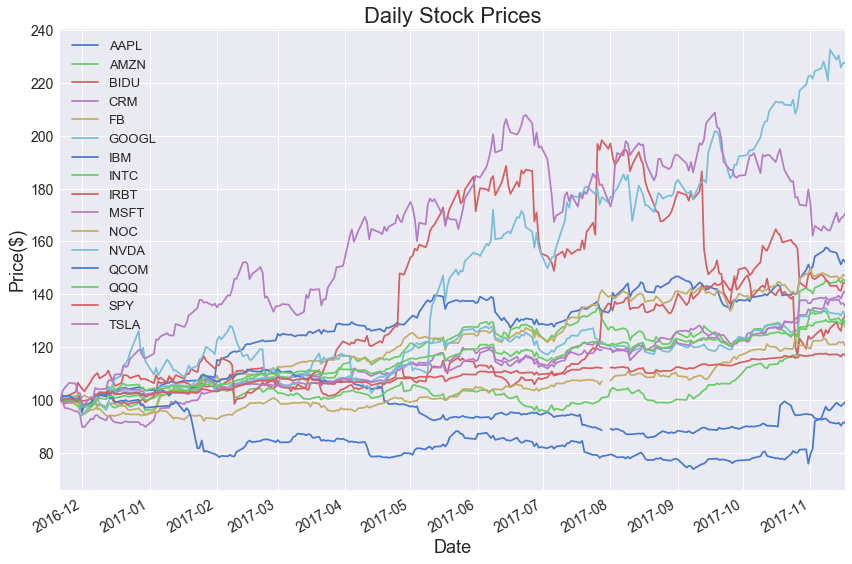

In [136]:
normalized.plot(figsize=(12,8))
plt.title('Daily Stock Prices', fontsize=22)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price($)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13)
plt.tight_layout()
plt.show()


AI companies versus SP500

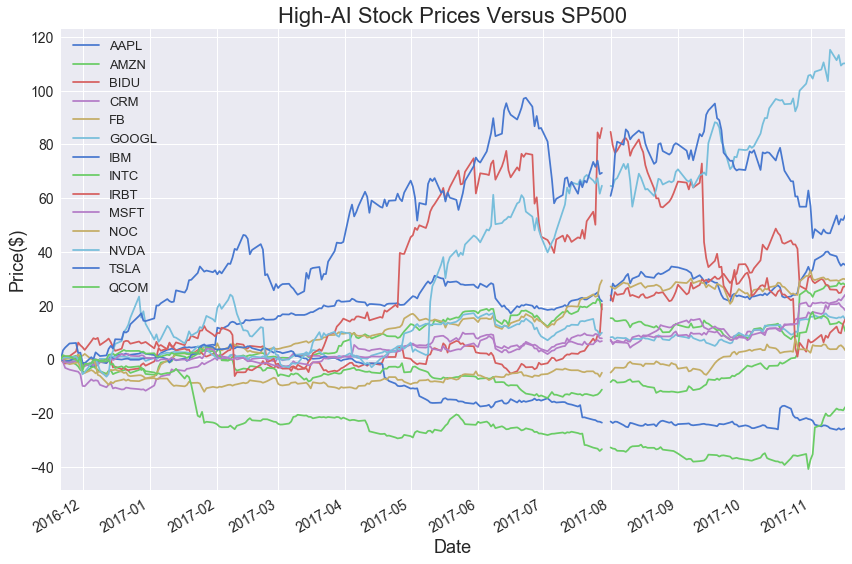

In [137]:
diff=normalized[AI_tickers].sub(normalized['SPY'], axis=0)
diff.plot(figsize=(12,8))
plt.title('High-AI Stock Prices Versus SP500', fontsize=22)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price($)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13)
plt.tight_layout()
plt.show()

In [46]:
diff.tail()

minor,AAPL,AMZN,BIDU,CRM,FB,GOOGL,IBM,INTC,IRBT,MSFT,NOC,NVDA,TSLA,QCOM
Date,,,,,,,,,,,,,,
2017-11-13,38.362998,27.422664,25.918792,21.567325,29.466838,15.328023,-26.171129,13.446301,12.237608,20.563950,3.847746,111.340867,53.587260,-18.251812
2017-11-14,36.281651,28.678539,24.712668,22.430805,29.164525,15.656630,-25.597549,14.033308,10.106748,21.033665,4.924217,113.280434,50.228758,-18.709524
2017-11-15,34.844882,27.963221,24.870121,21.966211,29.651943,15.576182,-26.111296,13.475762,9.712864,19.861496,5.299048,109.349297,52.223784,-18.704782
2017-11-16,35.662578,28.331961,26.963960,23.077094,30.008510,16.122646,-25.860515,13.028695,13.252118,19.232748,4.556490,110.112129,51.883886,-18.949859
2017-11-17,35.157533,27.727180,27.279002,24.144572,29.869210,14.864909,-25.607451,10.457963,14.965427,18.263474,3.399415,110.188473,53.611069,-17.695549


In [48]:
round(diff.iloc[-1].mean(),2)

23.33

On average, high-AI companies outperformed the SP500 by 23.3% over the last year.  NVIDIA Corp let the way, at 111.3% over the SP500.  IBM and Qualcomm were the only companies to underperform the SP500.  

Now, let's look at high-AI companies relative to the more tech-heavy NASDAQ index. 

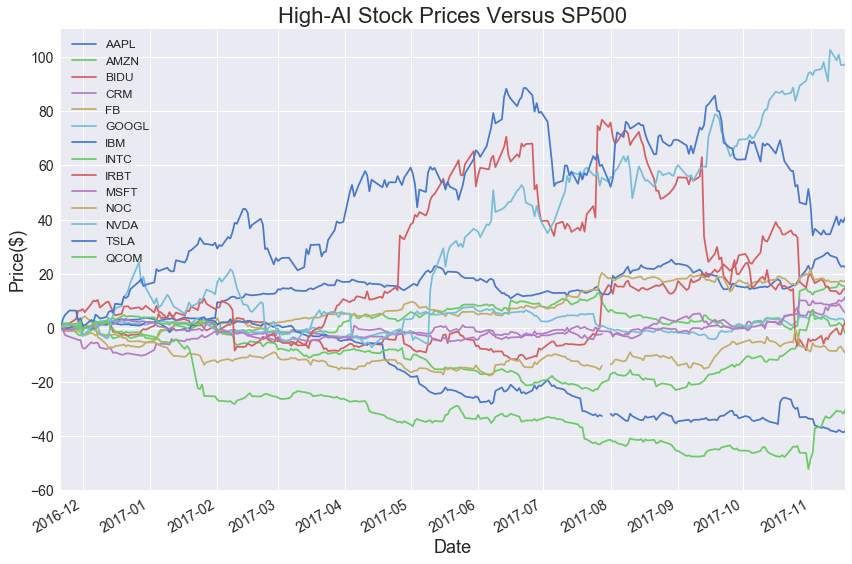

In [138]:
diff=normalized[AI_tickers].sub(normalized['QQQ'], axis=0)
diff.plot(figsize=(12,8))
plt.title('High-AI Stock Prices Versus SP500', fontsize=22)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price($)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=0, fontsize=12)
plt.tight_layout()
plt.show()

In [50]:
diff.tail(1)

minor,AAPL,AMZN,BIDU,CRM,FB,GOOGL,IBM,INTC,IRBT,MSFT,NOC,NVDA,TSLA,QCOM
Date,,,,,,,,,,,,,,
2017-11-17,22.414989,14.984637,14.536459,11.402028,17.126666,2.122365,-38.349994,-2.284581,2.222884,5.520931,-9.343128,97.445929,40.868526,-30.438092


In [51]:
round(diff.iloc[-1].mean(),2)

10.59

The high-AI companies also outperformed the NASDAQ index by 10.6%.  In addition to IBM and Qualcomm, Intel and Northrop Grumman undeperformed the index. 



In [52]:
High_AI_index=normalized[AI_tickers].mean(axis=1)
SP500_index=normalized['SPY']
NASDAQ_index=normalized['QQQ']

In [53]:
High_AI_index

Date
2016-11-21    100.000000
2016-11-22    100.661627
2016-11-23    100.169777
2016-11-25    100.560003
2016-11-28    100.545748
2016-11-29    100.603231
2016-11-30     99.609124
2016-12-01     97.100726
2016-12-02     97.354982
2016-12-05     98.912166
2016-12-06     99.379554
2016-12-07    101.041173
2016-12-08    100.780762
2016-12-09    101.067556
2016-12-12    100.429105
2016-12-13    102.049991
2016-12-14    101.937880
2016-12-15    101.722395
2016-12-16    101.337610
2016-12-19    101.917881
2016-12-20    102.954133
2016-12-21    102.811305
2016-12-22    102.600453
2016-12-23    102.848624
2016-12-27    104.093612
2016-12-28    102.830789
2016-12-29    102.814738
2016-12-30    101.601579
2017-01-03    102.177528
2017-01-04    103.499871
                 ...    
2017-10-09    133.518435
2017-10-10    134.646978
2017-10-11    134.849267
2017-10-12    135.349539
2017-10-13    135.702546
2017-10-16    136.312593
2017-10-17    136.590268
2017-10-18    137.128958
2017-10-19    136.16

In [54]:
normalized_indexes=pd.concat([SP500_index, NASDAQ_index, High_AI_index], axis=1)

In [55]:
normalized_indexes.tail(1)

,SPY,QQQ,0
Date,,,
2017-11-17,117.12923,129.871773,140.459603


In [56]:
normalized_indexes.columns=['SP500', 'NASDAQ', 'High-AI']

In [57]:
normalized_indexes.tail(1)

,SP500,NASDAQ,High-AI
Date,,,
2017-11-17,117.12923,129.871773,140.459603


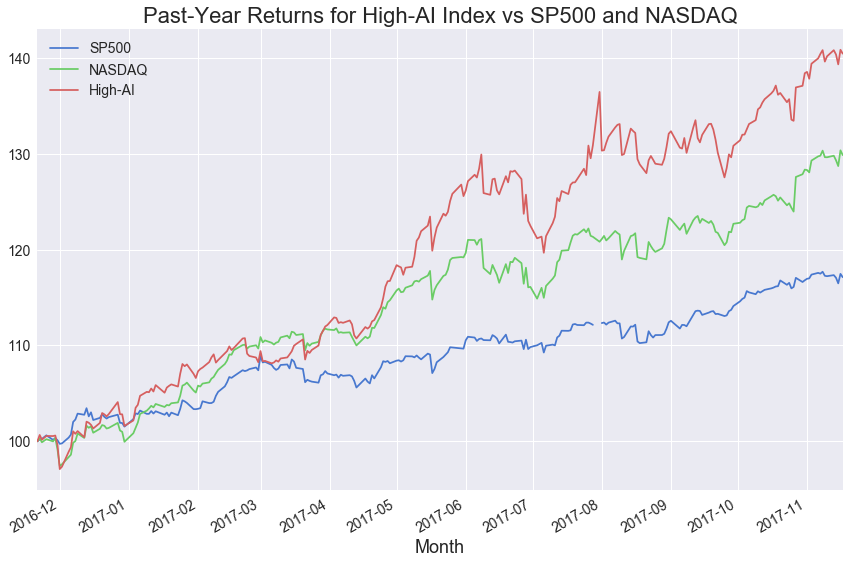

In [139]:
normalized_indexes.plot(figsize=(12,8))
plt.title('Past-Year Returns for High-AI Index vs SP500 and NASDAQ', fontsize=22)
plt.xlabel('Month', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

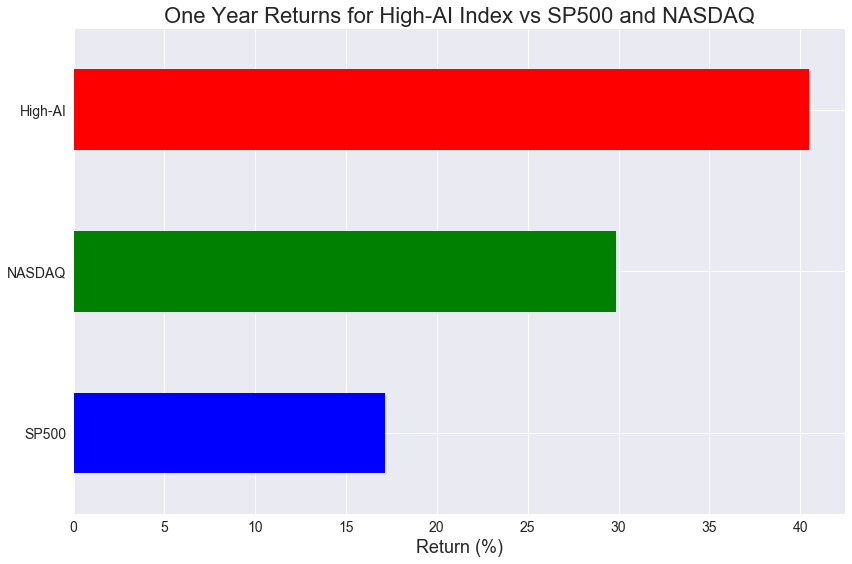

In [117]:
normalized_indexes.iloc[-1].apply(lambda x: x-100).plot(kind='barh', color=['blue', 'green', 'red'], figsize=(12,8))
plt.title('One Year Returns for High-AI Index vs SP500 and NASDAQ', fontsize=22)
plt.xlabel('Return (%)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [97]:
normalized_indexes[:10]

,SP500,NASDAQ,High-AI
Date,,,
2016-11-21,100.000000,100.000000,100.000000
2016-11-22,100.195321,100.303695,100.661627
2016-11-23,100.249830,99.898768,100.169777
2016-11-25,100.622303,100.219335,100.560003
2016-11-28,100.149898,99.991564,100.545748
2016-11-29,100.345219,100.337439,100.603231
2016-11-30,100.104474,99.122659,99.609124
2016-12-01,99.736543,97.410157,97.100726
2016-12-02,99.786509,97.604184,97.354982


In the past year, the High-AI index is up 40.5%, compared with +29.9% for the NASDAQ and +17.1% for the SP500. 

In [86]:
calendar_days=normalized_indexes.asfreq('D')  # Resample to calendar days 
calendar_days.fillna(method="ffill", inplace=True)  #Fill non-trading days with the last trading day's value
calendar_days[:10]

,SP500,NASDAQ,High-AI
Date,,,
2016-11-21,100.000000,100.000000,100.000000
2016-11-22,100.195321,100.303695,100.661627
2016-11-23,100.249830,99.898768,100.169777
2016-11-24,100.249830,99.898768,100.169777
2016-11-25,100.622303,100.219335,100.560003
2016-11-26,100.622303,100.219335,100.560003
2016-11-27,100.622303,100.219335,100.560003
2016-11-28,100.149898,99.991564,100.545748
2016-11-29,100.345219,100.337439,100.603231


In [87]:
quarterly=calendar_days.asfreq('M')  # Resample monthly 
quarterly

,SP500,NASDAQ,High-AI
Date,,,
2016-11-30,100.104474,99.122659,99.609124
2016-12-31,101.535317,99.949384,101.601579
2017-01-31,103.352260,105.086891,106.608121
2017-02-28,107.413127,109.684495,108.255478
2017-03-31,107.081535,111.675384,112.140197
2017-04-30,108.144447,114.720769,116.734716
2017-05-31,109.670679,119.191834,125.590060
2017-06-30,109.834204,116.112705,122.491027
2017-07-31,112.155349,120.828412,136.464043


In [91]:
quarterly_pct_change=quarterly.join(quarterly.pct_change().mul(100).add_suffix('_PCT_CHANGE'))
quarterly_pct_change

,SP500,NASDAQ,High-AI,SP500_PCT_CHANGE,NASDAQ_PCT_CHANGE,High-AI_PCT_CHANGE
Date,,,,,,
2016-11-30,100.104474,99.122659,99.609124,NaN,NaN,NaN
2016-12-31,101.535317,99.949384,101.601579,1.429349,0.834043,2.000274
2017-01-31,103.352260,105.086891,106.608121,1.789469,5.140108,4.927623
2017-02-28,107.413127,109.684495,108.255478,3.929152,4.375050,1.545245
2017-03-31,107.081535,111.675384,112.140197,-0.308707,1.815105,3.588473
2017-04-30,108.144447,114.720769,116.734716,0.992619,2.726998,4.097121
2017-05-31,109.670679,119.191834,125.590060,1.411290,3.897345,7.585870
2017-06-30,109.834204,116.112705,122.491027,0.149105,-2.583339,-2.467578
2017-07-31,112.155349,120.828412,136.464043,2.113317,4.061319,11.407379


In [92]:
quarterly_pct_change.columns

Index(['SP500', 'NASDAQ', 'High-AI', 'SP500_PCT_CHANGE', 'NASDAQ_PCT_CHANGE',
       'High-AI_PCT_CHANGE'],
      dtype='object')

In [95]:
quarterly_pct_change=quarterly_pct_change[['SP500_PCT_CHANGE', 'NASDAQ_PCT_CHANGE', 'High-AI_PCT_CHANGE']].iloc[1:,:]
quarterly_pct_change

,SP500_PCT_CHANGE,NASDAQ_PCT_CHANGE,High-AI_PCT_CHANGE
Date,,,
2016-12-31,1.429349,0.834043,2.000274
2017-01-31,1.789469,5.140108,4.927623
2017-02-28,3.929152,4.375050,1.545245
2017-03-31,-0.308707,1.815105,3.588473
2017-04-30,0.992619,2.726998,4.097121
2017-05-31,1.411290,3.897345,7.585870
2017-06-30,0.149105,-2.583339,-2.467578
2017-07-31,2.113317,4.061319,11.407379
2017-08-31,0.234903,2.073588,-3.197597


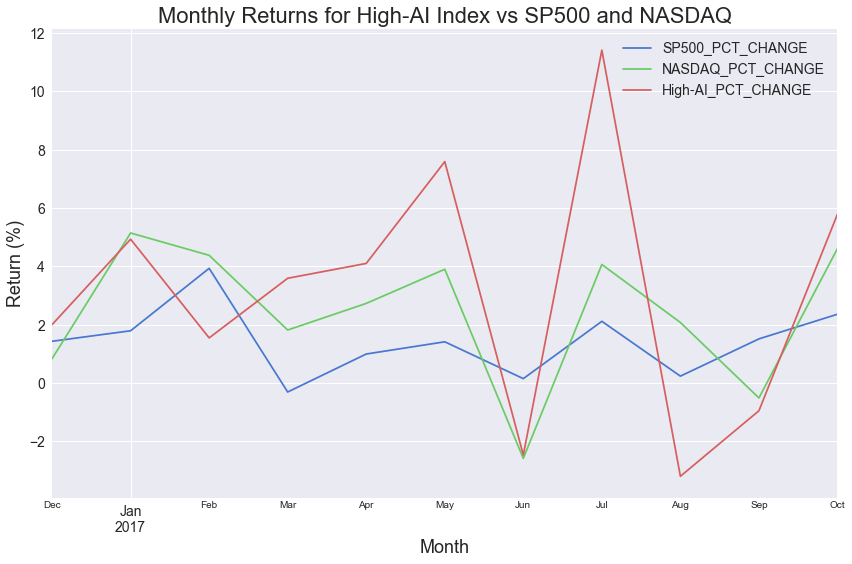

In [140]:
quarterly_pct_change.plot(figsize=(12,8))
plt.title('Monthly Returns for High-AI Index vs SP500 and NASDAQ', fontsize=22)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Return (%)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()